<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [1]:
import numpy as np

def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    # Проверим, что X и V имеют одинаковую длину
    if len(X) != len(V):
        raise ValueError("Количество матриц и векторов должно быть одинаковым.")
    
    # Инициализируем переменную для суммы
    total_sum = 0
    
    # Пройдемся по всем матрицам и векторами и вычислим их произведение
    for i in range(len(X)):
        total_sum += np.dot(X[i], V[i])  # Произведение матрицы и вектора
    
    return total_sum

# Тесты
X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
V = [np.array([[1], [1]]), np.array([[1], [1]])]

result = sum_prod(X, V)
print("Сумма произведений матриц на векторы:", result)

# Проверка на другие данные
X2 = [np.array([[2, 3], [1, 4]]), np.array([[0, 1], [1, 0]])]
V2 = [np.array([[1], [1]]), np.array([[1], [1]])]

result2 = sum_prod(X2, V2)
print("Сумма произведений матриц на векторы для второго набора данных:", result2)

Сумма произведений матриц на векторы: [[14]
 [22]]
Сумма произведений матриц на векторы для второго набора данных: [[6]
 [6]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [2]:
import numpy as np

def binarize(M, threshold=0.5):
    '''
    Функция бинаризует матрицу M по заданному порогу threshold.
    Все элементы матрицы, которые больше порога, становятся равными 1, 
    все остальные — равными 0.
    
    M - матрица (numpy array)
    threshold - порог (по умолчанию 0.5)
    '''
    return (M > threshold).astype(int)  # Возвращаем матрицу, где True становится 1, а False — 0

# Тесты
# Пример матрицы
M = np.array([[0.2, 0.8, 0.6],
              [0.4, 0.1, 0.9],
              [0.7, 0.3, 0.5]])

# Бинаризация с порогом 0.5
binary_M = binarize(M, threshold=0.5)

# Ожидаемый результат:
# Все значения > 0.5 становятся 1, остальные — 0
expected_result = np.array([[0, 1, 1],
                            [0, 0, 1],
                            [1, 0, 0]])

# Проверка
assert np.array_equal(binary_M, expected_result)

# Тест с другим порогом
binary_M2 = binarize(M, threshold=0.3)
expected_result2 = np.array([[0, 1, 1],
                             [1, 0, 1],
                             [1, 0, 1]])

assert np.array_equal(binary_M2, expected_result2)

print("Все тесты успешно пройдены!")

Все тесты успешно пройдены!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Математическое ожидание по строкам: [ 0.36297076  0.19520468 -0.54608875 -0.4215683  -0.2807916 ]
Дисперсия по строкам: [2.15970855 0.09465992 0.8788623  0.06823473 2.71633366]
Математическое ожидание по столбцам: [ 0.14093302  0.32940288 -0.66939192 -0.35316256]
Дисперсия по столбцам: [2.42002921 1.27637945 0.41900779 0.49734864]


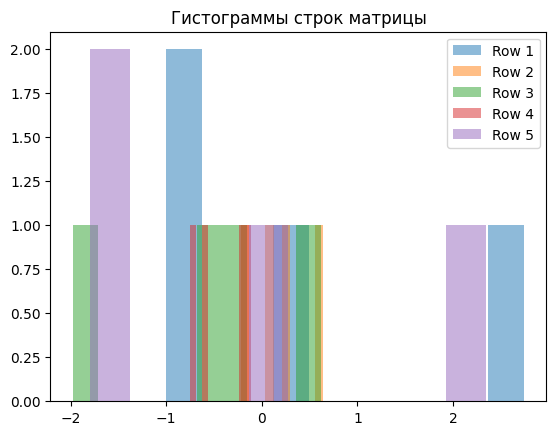

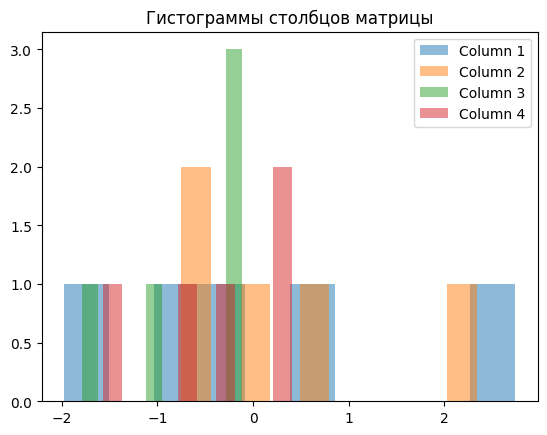

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_matrix(m, n, mean=0, std=1):
    """
    Функция генерирует матрицу размером m x n, заполненную случайными числами,
    распределенными по нормальному закону с заданным математическим ожиданием
    и стандартным отклонением.
    """
    return np.random.normal(mean, std, (m, n))

def calculate_statistics(matrix):
    """
    Функция вычисляет математическое ожидание и дисперсию для строк и столбцов матрицы.
    Возвращает кортеж из:
    - математическое ожидание по строкам
    - дисперсия по строкам
    - математическое ожидание по столбцам
    - дисперсия по столбцам
    """
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)
    
    return row_means, row_variances, col_means, col_variances

def plot_histograms(matrix):
    """
    Функция строит гистограммы для значений в строках и столбцах матрицы.
    """
    # Строим гистограмму для каждой строки
    for i, row in enumerate(matrix):
        plt.hist(row, bins=10, alpha=0.5, label=f"Row {i + 1}")
    
    plt.title("Гистограммы строк матрицы")
    plt.legend(loc='upper right')
    plt.show()
    
    # Строим гистограмму для каждого столбца
    for i in range(matrix.shape[1]):
        plt.hist(matrix[:, i], bins=10, alpha=0.5, label=f"Column {i + 1}")
    
    plt.title("Гистограммы столбцов матрицы")
    plt.legend(loc='upper right')
    plt.show()

# Пример использования
m, n = 5, 4  # размер матрицы 5x4
matrix = generate_matrix(m, n)

# Вычисление статистик
row_means, row_variances, col_means, col_variances = calculate_statistics(matrix)

# Выводим результаты
print("Математическое ожидание по строкам:", row_means)
print("Дисперсия по строкам:", row_variances)
print("Математическое ожидание по столбцам:", col_means)
print("Дисперсия по столбцам:", col_variances)

# Строим гистограммы
plot_histograms(matrix)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [3]:
def chess(m, n, a, b):
    """
    Функция создает матрицу размером m x n, заполняя ее числами a и b в шахматном порядке.
    
    :param m: количество строк в матрице
    :param n: количество столбцов в матрице
    :param a: число, которое будет находиться в черных клетках
    :param b: число, которое будет находиться в белых клетках
    :return: матрица размером m x n, заполненная числами a и b
    """
    # Создаем пустую матрицу m x n
    matrix = [[0 for _ in range(n)] for _ in range(m)]
    
    # Заполняем матрицу числами a и b в шахматном порядке
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b
    
    return matrix

# Тест 1: матрица 3x3, a = 1, b = 0
matrix1 = chess(3, 3, 1, 0)
for row in matrix1:
    print(row)
# Ожидаемый вывод:
# [1, 0, 1]
# [0, 1, 0]
# [1, 0, 1]

# Тест 2: матрица 4x4, a = 5, b = 10
matrix2 = chess(4, 4, 5, 10)
for row in matrix2:
    print(row)
# Ожидаемый вывод:
# [5, 10, 5, 10]
# [10, 5, 10, 5]
# [5, 10, 5, 10]
# [10, 5, 10, 5]

# Тест 3: матрица 2x5, a = 7, b = 3
matrix3 = chess(2, 5, 7, 3)
for row in matrix3:
    print(row)
# Ожидаемый вывод:
# [7, 3, 7, 3, 7]
# [3, 7, 3, 7, 3]

[1, 0, 1]
[0, 1, 0]
[1, 0, 1]
[5, 10, 5, 10]
[10, 5, 10, 5]
[5, 10, 5, 10]
[10, 5, 10, 5]
[7, 3, 7, 3, 7]
[3, 7, 3, 7, 3]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

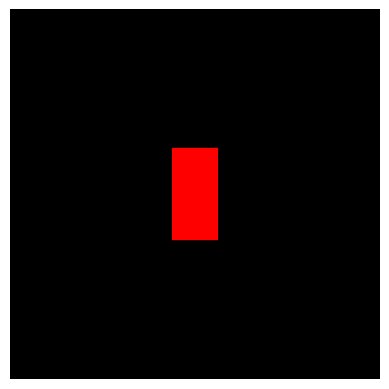

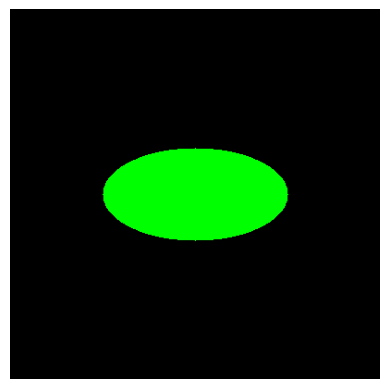

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    """
    Функция рисует прямоугольник на изображении заданных размеров.
    :param a: ширина прямоугольника
    :param b: высота прямоугольника
    :param m: ширина изображения
    :param n: высота изображения
    :param rectangle_color: цвет прямоугольника в RGB
    :param background_color: цвет фона в RGB
    """
    # Создаем изображение с фоном
    img = np.ones((m, n, 3), dtype=np.uint8) * np.array(background_color, dtype=np.uint8)

    # Рисуем прямоугольник
    img[(m - a) // 2: (m + a) // 2, (n - b) // 2: (n + b) // 2] = np.array(rectangle_color, dtype=np.uint8)

    return img

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    """
    Функция рисует эллипс на изображении заданных размеров.
    :param a: полуширина эллипса
    :param b: полувысота эллипса
    :param m: ширина изображения
    :param n: высота изображения
    :param ellipse_color: цвет эллипса в RGB
    :param background_color: цвет фона в RGB
    """
    # Создаем изображение с фоном
    img = np.ones((m, n, 3), dtype=np.uint8) * np.array(background_color, dtype=np.uint8)

    # Генерация эллипса
    y, x = np.ogrid[:m, :n]
    mask = ((x - n // 2) ** 2) / (a ** 2) + ((y - m // 2) ** 2) / (b ** 2) <= 1
    img[mask] = np.array(ellipse_color, dtype=np.uint8)

    return img

# Тесты

# Прямоугольник
rectangle_img = draw_rectangle(100, 50, 400, 400, (255, 0, 0), (0, 0, 0))  # красный прямоугольник на черном фоне
plt.imshow(rectangle_img)
plt.axis('off')  # Скрыть оси
plt.show()

# Эллипс
ellipse_img = draw_ellipse(100, 50, 400, 400, (0, 255, 0), (0, 0, 0))  # зеленый эллипс на черном фоне
plt.imshow(ellipse_img)
plt.axis('off')  # Скрыть оси
plt.show()


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [4]:
import numpy as np

def time_series_analysis(series, window_size):
    """
    Функция выполняет анализ временного ряда:
    - Математическое ожидание
    - Дисперсия
    - СКО
    - Локальные максимумы и минимумы
    - Скользящее среднее
    
    :param series: Временной ряд (список или массив)
    :param window_size: Размер окна для скользящего среднего
    :return: Результаты анализа
    """
    
    # 1. Математическое ожидание
    mean = np.mean(series)
    
    # 2. Дисперсия
    variance = np.var(series)
    
    # 3. СКО (среднеквадратическое отклонение)
    std_dev = np.std(series)
    
    # 4. Локальные максимумы и минимумы
    local_maxima = []
    local_minima = []
    
    for i in range(1, len(series) - 1):
        if series[i] > series[i-1] and series[i] > series[i+1]:  # локальный максимум
            local_maxima.append(i)
        elif series[i] < series[i-1] and series[i] < series[i+1]:  # локальный минимум
            local_minima.append(i)
    
    # 5. Скользящее среднее
    rolling_mean = np.convolve(series, np.ones(window_size)/window_size, mode='valid')
    
    return {
        "mean": mean,
        "variance": variance,
        "std_dev": std_dev,
        "local_maxima": local_maxima,
        "local_minima": local_minima,
        "rolling_mean": rolling_mean
    }

# Пример использования:
time_series = [1, 2, 3, 2, 1, 3, 4, 2, 5, 6, 3, 2]
window_size = 3

results = time_series_analysis(time_series, window_size)

print("Математическое ожидание:", results["mean"])
print("Дисперсия:", results["variance"])
print("СКО:", results["std_dev"])
print("Локальные максимумы:", results["local_maxima"])
print("Локальные минимумы:", results["local_minima"])
print("Скользящее среднее:", results["rolling_mean"])


Математическое ожидание: 2.8333333333333335
Дисперсия: 2.138888888888889
СКО: 1.4624940645653537
Локальные максимумы: [2, 6, 9]
Локальные минимумы: [4, 7]
Скользящее среднее: [2.         2.33333333 2.         2.         2.66666667 3.
 3.66666667 4.33333333 4.66666667 3.66666667]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [6]:
import numpy as np

def one_hot_encoding(labels):
    """
    Функция выполняет one-hot encoding для вектора целочисленных меток классов.
    
    :param labels: Список или массив целочисленных меток классов.
    :return: Массив one-hot encoding.
    """
    # Находим максимальное значение метки, чтобы определить количество классов
    num_classes = max(labels) + 1
    
    # Создаем пустой массив для one-hot encoding
    one_hot = np.zeros((len(labels), num_classes), dtype=int)
    
    # Заполняем массив
    for i, label in enumerate(labels):
        one_hot[i, label] = 1
    
    return one_hot

# Тесты
labels = [0, 2, 3, 0]
encoded = one_hot_encoding(labels)
print("One-hot encoding:")
print(encoded)

# Ожидаемый вывод:
# One-hot encoding:
# [[1 0 0 0]
#  [0 0 1 0]
#  [0 0 0 1]
#  [1 0 0 0]]


One-hot encoding:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
